In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from sklearn.model_selection import train_test_split

In [361]:
#sep=';' é para separar as colunas por ponto e vírgula(pois o dataset esta formatado assim)
df = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2020_Parte1_04abr2023.csv',sep=';')
df2 = pd.read_csv(r'C:\Users\arthu\Downloads\HIST_PAINEL_COVIDBR_2020_Parte2_04abr2023.csv',sep=';')

In [362]:
df2

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-01,31,1777225.0,39504,512,881,9,NaN,NaN,NaN
1,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-02,32,1777225.0,39893,389,884,3,NaN,NaN,NaN
2,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-03,32,1777225.0,40016,123,888,4,NaN,NaN,NaN
3,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-04,32,1777225.0,41239,1223,898,10,NaN,NaN,NaN
4,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-05,32,1777225.0,42020,781,918,20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859549,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
859550,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0
859551,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,NaN,NaN,1.0
859552,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,NaN,NaN,1.0


In [363]:
#pegue apenas as colunas estado, data, casosAcumulado, casosNovos
df = df[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]
df2 = df2[['estado','data','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos','Recuperadosnovos']]


In [364]:
df

,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos
0,RO,2020-02-25,0,0,0,0,NaN
1,RO,2020-02-26,0,0,0,0,NaN
2,RO,2020-02-27,0,0,0,0,NaN
3,RO,2020-02-28,0,0,0,0,NaN
4,RO,2020-02-29,0,0,0,0,NaN
...,...,...,...,...,...,...,...
714318,DF,2020-07-27,98480,2148,1339,31,NaN
714319,DF,2020-07-28,100726,2246,1391,52,NaN
714320,DF,2020-07-29,102342,1616,1419,28,NaN
714321,DF,2020-07-30,104442,2100,1444,25,NaN


In [365]:
#Como Recuperadosnovos tem muitos valores nulos, vamos retirar essa coluna
df = df.drop(columns=['Recuperadosnovos'])
df2 = df2.drop(columns=['Recuperadosnovos'])

In [366]:
df

,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,RO,2020-02-25,0,0,0,0
1,RO,2020-02-26,0,0,0,0
2,RO,2020-02-27,0,0,0,0
3,RO,2020-02-28,0,0,0,0
4,RO,2020-02-29,0,0,0,0
...,...,...,...,...,...,...
714318,DF,2020-07-27,98480,2148,1339,31
714319,DF,2020-07-28,100726,2246,1391,52
714320,DF,2020-07-29,102342,1616,1419,28
714321,DF,2020-07-30,104442,2100,1444,25


In [367]:
#dropna() é para retirar as linhas que tem valores nulos
df = df.dropna()
df2 = df2.dropna()

In [368]:
#Agora vamos juntar os dois datasets
df = df.append(df2, ignore_index=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_4968\1502539163.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [369]:
df

,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,RO,2020-02-25,0,0,0,0
1,RO,2020-02-26,0,0,0,0
2,RO,2020-02-27,0,0,0,0
3,RO,2020-02-28,0,0,0,0
4,RO,2020-02-29,0,0,0,0
...,...,...,...,...,...,...
1573872,DF,2020-12-27,248543,615,4201,3
1573873,DF,2020-12-28,249736,1193,4223,22
1573874,DF,2020-12-29,250457,721,4241,18
1573875,DF,2020-12-30,251135,678,4248,7


In [370]:
#somar os valores de data que são iguais e resetar o index para que não fique com valores repetidos
df = df.groupby('data').sum().reset_index() 

C:\Users\arthu\AppData\Local\Temp\ipykernel_4968\336546086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('data').sum().reset_index()


In [371]:
df

,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2020-02-25,0,0,0,0
1,2020-02-26,1,1,0,0
2,2020-02-27,1,0,0,0
3,2020-02-28,1,0,0,0
4,2020-02-29,2,1,0,0
...,...,...,...,...,...
306,2020-12-27,14968570,36958,382278,688
307,2020-12-28,15009666,41096,383140,862
308,2020-12-29,15127102,117436,385362,2222
309,2020-12-30,15238400,111298,387750,2388


In [372]:
#Vamos apenas utilizar obitosNovos onde data será o index
df = df[['data','obitosNovos']]
df['data'] = pd.date_range(start='2020-02-25', periods=len(df), freq='D')
df = df.set_index('data')
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

C:\Users\arthu\AppData\Local\Temp\ipykernel_4968\1028543809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.date_range(start='2020-02-25', periods=len(df), freq='D')


In [374]:
df

,obitosNovos
2020-02-25,0
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
...,...
2020-12-27,688
2020-12-28,862
2020-12-29,2222
2020-12-30,2388


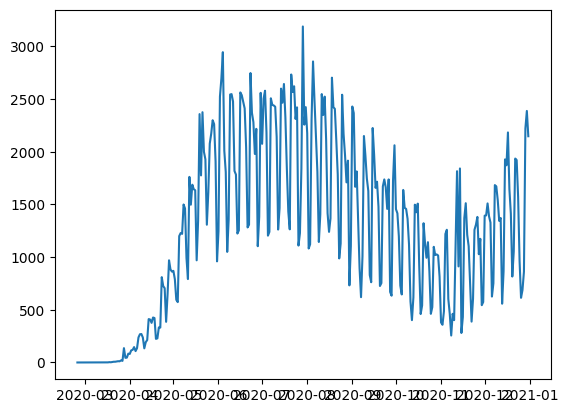

In [375]:
plt.plot(df['obitosNovos'])

plt.show()

In [376]:
def check_stationarity(series):

    result = adfuller(series) 

    print('Estatística ADF: %f' % result[0])

    print('p-valor: %f' % result[1])
    if result[1]<0.05:
        print('A série temporal é estacionária')
    else: 
        print('A série temporal não é estacionária pois p-valor ≥ 0,05')

In [377]:
check_stationarity(df['obitosNovos'])

Estatística ADF: -1.966706
p-valor: 0.301359
A série temporal não é estacionária pois p-valor ≥ 0,05


In [378]:
def series_decomposition(series, method='additive'):
    result = seasonal_decompose(series, model=method)
    result.plot()
    plt.show()

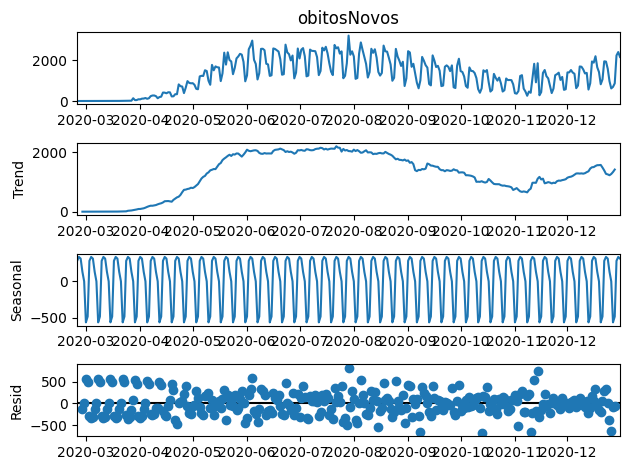

In [379]:
series_decomposition(df['obitosNovos'])

##### Podemos ver que os dados possuem tendência e sazonalidade. Isso exige o modelo SARIMA

### Ao observar o gráfico de obitosNovos é possível verificar uma sazonalidade que é um padrão de comportamento, indo mais a fundo podemos observar que os periodos em que ocorrem menos novas mortes são aos sábados e domingos que são geralmente os dias em que menos pessoas saíram de suas casas para trabalhar, no primeiro ano da pandemia.

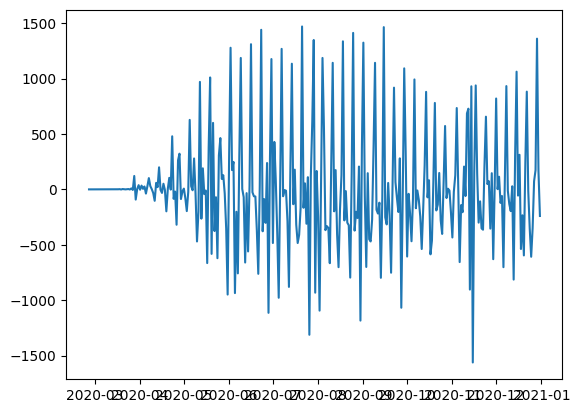

In [381]:
#Para aplicar modelos ARIMA/SARIMA é necessário que os dados sejam estacionários. 

df_diff = df
plt.plot(df_diff['obitosNovos'].diff(1)) #diferenciação de ordem 1 para tornar a série estacionária
plt.show()

In [382]:
# com uma ordem de diferenciação a série temporal já se torna estacionária
check_stationarity(df_diff['obitosNovos'].diff(1).dropna())

Estatística ADF: -3.073522
p-valor: 0.028576
A série temporal é estacionária


##### O parâmetro d é igual a 1 pois com uma ordem já foi possível tornar estacionária."d" é o número de vezes que é necessário diferenciar os dados originais para torná-los estacionários, ou seja, para remover a tendência e tornar a série temporal mais previsível.

In [383]:
#Agora vamos encontrar os outros parâmetros do modelo SARIMA (p,d,q)

def plot_acf_pacf_graphs(series):
    fig, ax = plt.subplots(2,1)
    fig = sm.graphics.tsa.plot_acf(series, lags=25, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(series, lags=25, ax=ax[1])
    plt.tight_layout()
    plt.show()

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


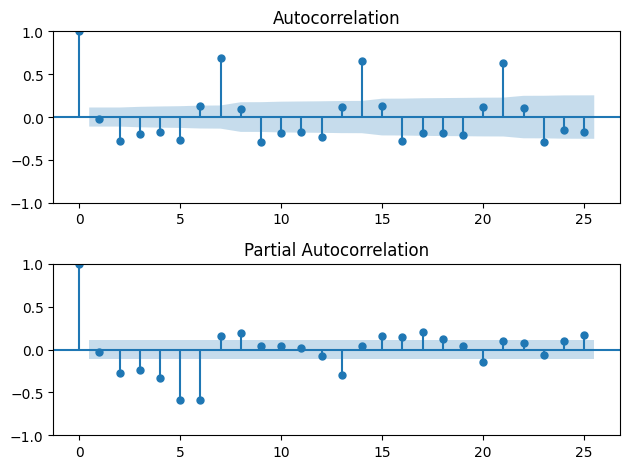

In [384]:
plot_acf_pacf_graphs(df['obitosNovos'].diff(1).dropna())

### O gráfico de autocorrelação. Quando a autocorrelação aumenta, indica que há uma relação mais forte entre os valores passados e futuros da série temporal, o que sugere que o modelo deve levar em consideração essa relação ao realizar previsões.

### No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem. A região azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, metade dos valores ACF estão dentro do limite da linha tracejada azul e metade está fora. Ou seja, indica sazonalidade.

### No gráfico PACF, o valor de P é determinado pelo último lag significativo, ou seja, o último lag que ultrapassa a faixa de confiança superior. Porém, é importante lembrar que os lags que não ultrapassam a faixa de confiança superior não podem ser descartados imediatamente, pois eles podem ser importantes para modelar a série. Como o último lag que ultrapassa a faixa está um pouco antes da defasagem 25, P = 24

### Já no gráfico ACF, a escolha de P pode ser feita através da observação do número de lags significativos que aparecem antes de ocorrer a sazonalidade. Por exemplo, se a sazonalidade ocorre a cada 12 lags, é possível que haja picos significativos no gráfico ACF a cada 12 lags. Nesse caso, o valor de P pode ser escolhido com base no último lag significativo antes da sazonalidade começar a aparecer. No nosso caso a sazonalidade ocorre a cada 5 lags e vai diminuindo, e o último lag significativo antes da sazonalidade começar a aparecer está depois da defasagem 20.

### O valor de Q é determinado pelo último valor significativo no gráfico(ACF), ou seja, o número de defasagens que ultrapassam a faixa de confiança superior (linha tracejada azul no gráfico). Portanto Q = 12

In [385]:
#Vamos utilizar o auto_arima para encontrar os parâmetros do modelo SARIMA
#Antes é preciso separar os dados de treino e teste 80% para treino e 20% para não viciar o modelo

train_size = 0.8

train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [386]:
# cria o objeto auto_arima e ajusta o modelo apenas com os dados de treino 
model = pm.auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True) # m=7 sazonlidade semanal

# imprime os parâmetros do modelo ajustado
print(model.order) # (p, d, q)
print(model.seasonal_order) # (P, D, Q, s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3773.085, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3545.956, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3628.428, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3771.104, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3775.053, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3512.510, Time=0.32 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3494.848, Time=1.07 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3492.814, Time=0.66 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3671.134, Time=0.18 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3494.943, Time=0.90 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3621.992, Time=0.50 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3533.610, Time=0.32 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3

In [387]:
# Cria o modelo SARIMA com os parâmetros selecionados pelo auto_arima
model = sm.tsa.SARIMAX(train, order=(5, 1, 1), seasonal_order=(2, 0, 2, 7))

# Ajusta o modelo
model_fit = model.fit()

# Faz as previsões no conjunto de teste
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [388]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(test, predictions)

# Calcula a raiz do erro médio quadrático
rmse = np.sqrt(mse)

# Calcula o erro absoluto médio
mae = np.mean(np.abs(predictions - test))

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


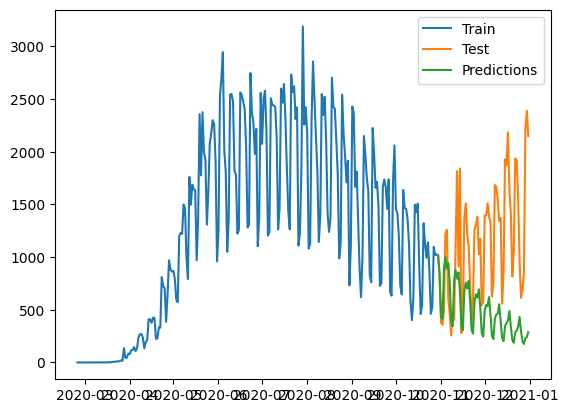

In [389]:
#Visualizar o desempenho do modelo
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

### Como os dados de treino estavam em queda o modelo previu que continuariam descendo, para contornar essa situação vamos tentar atribuir menos meses aos dados de treino

In [390]:
train_size = 0.7

train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [391]:
# cria o objeto auto_arima e ajusta o modelo apenas com os dados de treino 
model = pm.auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True) # m=7 sazonlidade semanal

# imprime os parâmetros do modelo ajustado
print(model.order) # (p, d, q)
print(model.seasonal_order) # (P, D, Q, s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3306.724, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3095.560, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3175.648, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3304.734, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3308.618, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3072.651, Time=0.70 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3057.715, Time=0.91 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3056.065, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3210.204, Time=0.17 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3057.569, Time=1.04 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3171.972, Time=0.34 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3094.912, Time=0.34 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3

In [392]:
# Cria o modelo SARIMA com os parâmetros selecionados pelo auto_arima
model = sm.tsa.SARIMAX(train, order=(3, 1, 2), seasonal_order=(1, 0, 1, 7))

# Ajusta o modelo
model_fit = model.fit()

# Faz as previsões no conjunto de teste
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [393]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(test, predictions)

# Calcula a raiz do erro médio quadrático
rmse = np.sqrt(mse)

# Calcula o erro absoluto médio
mae = np.mean(np.abs(predictions - test))

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


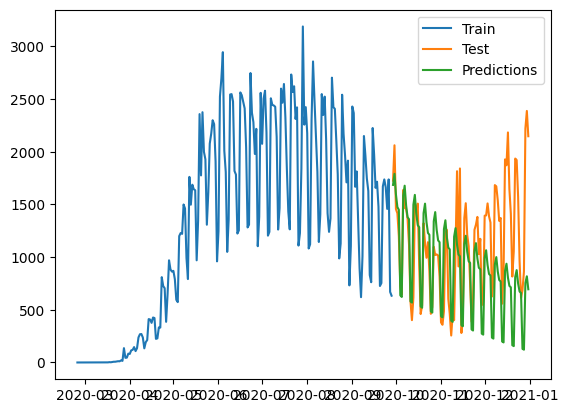

In [394]:
#Visualizar o desempenho do modelo
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

### Agora vamos atribuir mais meses para os dados de treino

In [395]:
train_size = 0.9

train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [396]:
# cria o objeto auto_arima e ajusta o modelo apenas com os dados de treino 
model = pm.auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True) # m=7 sazonlidade semanal

# imprime os parâmetros do modelo ajustado
print(model.order) # (p, d, q)
print(model.seasonal_order) # (P, D, Q, s)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4250.406, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4031.907, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4097.393, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4248.412, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4251.954, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3993.560, Time=0.35 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3966.912, Time=1.05 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3964.904, Time=0.82 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=4148.796, Time=0.22 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3966.903, Time=1.01 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=4099.787, Time=0.47 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4016.697, Time=0.46 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3

In [397]:
# Cria o modelo SARIMA com os parâmetros selecionados pelo auto_arima
model = sm.tsa.SARIMAX(train, order=(3, 1, 1), seasonal_order=(1, 0, 1, 7))

# Ajusta o modelo
model_fit = model.fit()

# Faz as previsões no conjunto de teste
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [398]:
#Avaliar o desempenho do modelo
mse = mean_squared_error(test, predictions)

# Calcula a raiz do erro médio quadrático
rmse = np.sqrt(mse)

# Calcula o erro absoluto médio
mae = np.mean(np.abs(predictions - test))

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


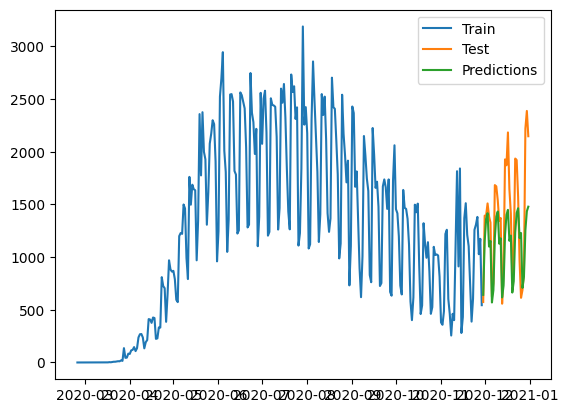

In [399]:
#Visualizar o desempenho do modelo
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

### Já está com uma previsão melhor encaixada, porém ainda está ruim. Talvez com mais dados de 2020 a 2021, o modelo se ajuste melhor.